# Exploration of DNN design choices using MNIST dataset

#### Import libraries

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

import tensorflow as tf
import keras

from keras.datasets import mnist

from keras.utils import to_categorical

from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Flatten, Activation, Dropout

from keras import regularizers

from sklearn.model_selection import train_test_split

#### Import dataset

In [2]:
data = mnist.load_data()

In [3]:
(X_train, y_train), (X_test, y_test) = data

In [4]:
print('Train: X=%s, y=%s' % (X_train.shape, y_train.shape))
print('Test: X=%s, y=%s' % (X_test.shape, y_test.shape))

Train: X=(60000, 28, 28), y=(60000,)
Test: X=(10000, 28, 28), y=(10000,)


#### Printing some training images

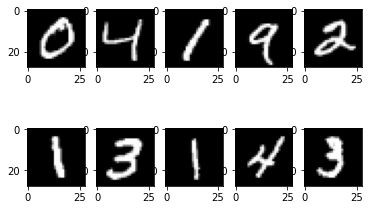

In [5]:
for i in range(1, 11):
    plt.subplot(2, 5, i)
    plt.imshow(X_train[i], cmap=plt.get_cmap('gray'))

plt.show()

#### Flatten the data

In [6]:
X_train = X_train.reshape((X_train.shape[0], 28*28)).astype('float32')
X_test = X_test.reshape((X_test.shape[0], 28*28)).astype('float32')

#### Normalize the data

In [7]:
X_train = X_train / 255
X_test = X_test / 255

# Exploration

In [8]:
def model(nodes, layers, activation_in, activation_out, loss, optimizer, metrics, epochs, X_train, y_train, X_test, y_test):

    model = Sequential()
    
    model.add(Dense(nodes, input_dim=28*28, activation=activation_in))
    
    for x in range(layers):
        model.add(Dense(nodes, activation=activation_in))

    model.add(Dense(10, activation=activation_out))

    model.compile(loss=loss, optimizer=optimizer, metrics=metrics)

    model.fit(X_train, to_categorical(y_train), epochs=epochs)

    score = model.evaluate(X_test, to_categorical(y_test))

    print(model.summary(), "\n", "Accuracy =", score[1]*100)

# 1. No. of Nodes

In [9]:
model1 = model(4, 0, 'relu', 'softmax', 'categorical_crossentropy', 'Adam', 'accuracy', 10, X_train, y_train, X_test, y_test)

Epoch 1/10
1875/1875 [==============================] - 8s 3ms/step - loss: 0.9293 - accuracy: 0.6960
Epoch 2/10
1875/1875 [==============================] - 5s 3ms/step - loss: 0.6472 - accuracy: 0.7994
Epoch 3/10
1875/1875 [==============================] - 5s 3ms/step - loss: 0.5800 - accuracy: 0.8267
Epoch 4/10
1875/1875 [==============================] - 5s 3ms/step - loss: 0.5445 - accuracy: 0.8395
Epoch 5/10
1875/1875 [==============================] - 5s 3ms/step - loss: 0.5211 - accuracy: 0.8476
Epoch 6/10
1875/1875 [==============================] - 5s 3ms/step - loss: 0.5028 - accuracy: 0.8540
Epoch 7/10
1875/1875 [==============================] - 6s 3ms/step - loss: 0.4868 - accuracy: 0.8593
Epoch 8/10
1875/1875 [==============================] - 5s 3ms/step - loss: 0.4752 - accuracy: 0.8619
Epoch 9/10
1875/1875 [==============================] - 6s 3ms/step - loss: 0.4662 - accuracy: 0.8647
Epoch 10/10
313/313 [==============================] - 1s 3ms/step - loss: 0.4797 

# 2. No. of Layers

In [11]:
model7 = model(32, 3, 'relu', 'softmax', 'categorical_crossentropy', 'Adam', 'accuracy', 10, X_train, y_train, X_test, y_test)

Epoch 1/10
1875/1875 [==============================] - 8s 3ms/step - loss: 0.3455 - accuracy: 0.8964
Epoch 2/10
1875/1875 [==============================] - 6s 3ms/step - loss: 0.1637 - accuracy: 0.9511
Epoch 3/10
1875/1875 [==============================] - 7s 4ms/step - loss: 0.1291 - accuracy: 0.9607
Epoch 4/10
1875/1875 [==============================] - 7s 4ms/step - loss: 0.1086 - accuracy: 0.9664
Epoch 5/10
1875/1875 [==============================] - 7s 4ms/step - loss: 0.0937 - accuracy: 0.9713
Epoch 6/10
1875/1875 [==============================] - 8s 4ms/step - loss: 0.0850 - accuracy: 0.9738
Epoch 7/10
1875/1875 [==============================] - 9s 5ms/step - loss: 0.0736 - accuracy: 0.9772
Epoch 8/10
1875/1875 [==============================] - 9s 5ms/step - loss: 0.0696 - accuracy: 0.9776
Epoch 9/10
1875/1875 [==============================] - 8s 4ms/step - loss: 0.0629 - accuracy: 0.9805
Epoch 10/10
313/313 [==============================] - 2s 4ms/step - loss: 0.1099 

# 3. Activation Function

In [12]:
model11 = model(32, 2, 'sigmoid','softmax','categorical_crossentropy','Adam', 'accuracy', 10, X_train, y_train, X_test, y_test)

Epoch 1/10
1875/1875 [==============================] - 9s 4ms/step - loss: 0.8990 - accuracy: 0.7691
Epoch 2/10
1875/1875 [==============================] - 7s 4ms/step - loss: 0.2582 - accuracy: 0.9288
Epoch 3/10
1875/1875 [==============================] - 10s 6ms/step - loss: 0.1896 - accuracy: 0.9453
Epoch 4/10
1875/1875 [==============================] - 8s 4ms/step - loss: 0.1573 - accuracy: 0.9548
Epoch 5/10
1875/1875 [==============================] - 8s 4ms/step - loss: 0.1379 - accuracy: 0.9610
Epoch 6/10
1875/1875 [==============================] - 8s 4ms/step - loss: 0.1231 - accuracy: 0.9646
Epoch 7/10
1875/1875 [==============================] - 8s 4ms/step - loss: 0.1116 - accuracy: 0.9672
Epoch 8/10
1875/1875 [==============================] - 8s 4ms/step - loss: 0.1033 - accuracy: 0.9699
Epoch 9/10
1875/1875 [==============================] - 8s 4ms/step - loss: 0.0939 - accuracy: 0.9727
Epoch 10/10
313/313 [==============================] - 1s 3ms/step - loss: 0.1347

# 4. Activation Function combinations

In [13]:
def model_afc(activation1, activation2, activation3):

    model = Sequential()

    model.add(Dense(32, input_dim=28*28, activation=activation1))

    model.add(Dense(32, activation=activation2))

    model.add(Dense(32, activation=activation2))

    model.add(Dense(10, activation='softmax'))

    model.compile(loss='categorical_crossentropy', optimizer='Adam', metrics='accuracy')

    model.fit(X_train, to_categorical(y_train), epochs=10)

    score = model.evaluate(X_test, to_categorical(y_test))

    print(model.summary(), "\n", "Accuracy =", score[1]*100)

In [14]:
model14 = model_afc('sigmoid','relu','tanh')

Epoch 1/10
1875/1875 [==============================] - 7s 3ms/step - loss: 0.4505 - accuracy: 0.8751
Epoch 2/10
1875/1875 [==============================] - 6s 3ms/step - loss: 0.2022 - accuracy: 0.9397
Epoch 3/10
1875/1875 [==============================] - 6s 3ms/step - loss: 0.1586 - accuracy: 0.9527
Epoch 4/10
1875/1875 [==============================] - 6s 3ms/step - loss: 0.1340 - accuracy: 0.9591
Epoch 5/10
1875/1875 [==============================] - 6s 3ms/step - loss: 0.1169 - accuracy: 0.9652
Epoch 6/10
1875/1875 [==============================] - 7s 4ms/step - loss: 0.1060 - accuracy: 0.9678
Epoch 7/10
1875/1875 [==============================] - 7s 4ms/step - loss: 0.0956 - accuracy: 0.9703
Epoch 8/10
1875/1875 [==============================] - 6s 3ms/step - loss: 0.0864 - accuracy: 0.9734
Epoch 9/10
1875/1875 [==============================] - 6s 3ms/step - loss: 0.0826 - accuracy: 0.9741
Epoch 10/10
313/313 [==============================] - 1s 2ms/step - loss: 0.1175 

# 5. Layer-node combinations

In [15]:
model17 = model(32, 1, 'relu', 'softmax', 'categorical_crossentropy', 'Adam', 'accuracy', 10, X_train, y_train, X_test, y_test)

Epoch 1/10
1875/1875 [==============================] - 8s 3ms/step - loss: 0.3432 - accuracy: 0.9000
Epoch 2/10
1875/1875 [==============================] - 6s 3ms/step - loss: 0.1738 - accuracy: 0.9486
Epoch 3/10
1875/1875 [==============================] - 6s 3ms/step - loss: 0.1322 - accuracy: 0.9599
Epoch 4/10
1875/1875 [==============================] - 7s 4ms/step - loss: 0.1085 - accuracy: 0.9678
Epoch 5/10
1875/1875 [==============================] - 12s 6ms/step - loss: 0.0949 - accuracy: 0.9704
Epoch 6/10
1875/1875 [==============================] - 12s 6ms/step - loss: 0.0847 - accuracy: 0.9742
Epoch 7/10
1875/1875 [==============================] - 12s 6ms/step - loss: 0.0754 - accuracy: 0.9765
Epoch 8/10
1875/1875 [==============================] - 11s 6ms/step - loss: 0.0701 - accuracy: 0.9779
Epoch 9/10
1875/1875 [==============================] - 12s 6ms/step - loss: 0.0628 - accuracy: 0.9805
Epoch 10/10
313/313 [==============================] - 2s 4ms/step - loss: 0.

# 6. Optimizer

In [16]:
def model_opt(optimizer):

    model = Sequential()

    model.add(Dense(32, input_dim=28*28, activation='relu'))

    model.add(Dense(32, activation='relu'))

    model.add(Dense(32, activation='relu'))

    model.add(Dense(10, activation='softmax'))
    
    model.compile(loss='categorical_crossentropy', optimizer=optimizer, metrics='accuracy')

    model.fit(X_train, to_categorical(y_train), epochs=10)

    score = model.evaluate(X_test, to_categorical(y_test))

    print(model.summary(), "\n", "Accuracy =", score[1]*100)

In [17]:
model20 = model_opt('SGD')

Epoch 1/10
1875/1875 [==============================] - 10s 4ms/step - loss: 0.8653 - accuracy: 0.7379
Epoch 2/10
1875/1875 [==============================] - 7s 4ms/step - loss: 0.3263 - accuracy: 0.9057
Epoch 3/10
1875/1875 [==============================] - 10s 5ms/step - loss: 0.2606 - accuracy: 0.9242
Epoch 4/10
1875/1875 [==============================] - 9s 5ms/step - loss: 0.2239 - accuracy: 0.9349
Epoch 5/10
1875/1875 [==============================] - 7s 3ms/step - loss: 0.1988 - accuracy: 0.9423
Epoch 6/10
1875/1875 [==============================] - 6s 3ms/step - loss: 0.1796 - accuracy: 0.9474
Epoch 7/10
1875/1875 [==============================] - 7s 4ms/step - loss: 0.1640 - accuracy: 0.9521
Epoch 8/10
1875/1875 [==============================] - 7s 4ms/step - loss: 0.1509 - accuracy: 0.9548
Epoch 9/10
1875/1875 [==============================] - 6s 3ms/step - loss: 0.1398 - accuracy: 0.9590
Epoch 10/10
313/313 [==============================] - 2s 3ms/step - loss: 0.134

# 7. L1, L2 Regularization

In [18]:
def model_reg(reg):

    model = Sequential()

    model.add(Dense(128, input_dim=28*28, activation='relu', kernel_regularizer=reg))

    model.add(Dense(128, activation='relu', kernel_regularizer=reg))

    model.add(Dense(128, activation='relu', kernel_regularizer=reg))

    model.add(Dense(10, activation='softmax'))

    model.compile(loss='categorical_crossentropy', optimizer='Adam', metrics='accuracy')

    model.fit(X_train, to_categorical(y_train), epochs=10)

    score = model.evaluate(X_test, to_categorical(y_test))

    print(model.summary(), "\n", "Accuracy =", score[1]*100)

In [19]:
model23 = model_reg(regularizers.l1(0.01))

Epoch 1/10
1875/1875 [==============================] - 13s 5ms/step - loss: 3.8030 - accuracy: 0.1197
Epoch 2/10
1875/1875 [==============================] - 10s 6ms/step - loss: 2.4614 - accuracy: 0.1121
Epoch 3/10
1875/1875 [==============================] - 10s 5ms/step - loss: 2.4612 - accuracy: 0.1124
Epoch 4/10
1875/1875 [==============================] - 11s 6ms/step - loss: 2.4611 - accuracy: 0.1124
Epoch 5/10
1875/1875 [==============================] - 9s 5ms/step - loss: 2.4610 - accuracy: 0.1124
Epoch 6/10
1875/1875 [==============================] - 8s 4ms/step - loss: 2.4610 - accuracy: 0.1124
Epoch 7/10
1875/1875 [==============================] - 8s 4ms/step - loss: 2.4610 - accuracy: 0.1124
Epoch 8/10
1875/1875 [==============================] - 7s 4ms/step - loss: 2.4610 - accuracy: 0.1124
Epoch 9/10
1875/1875 [==============================] - 8s 4ms/step - loss: 2.4610 - accuracy: 0.1124
Epoch 10/10
313/313 [==============================] - 1s 3ms/step - loss: 2.4

In [20]:
model25 = model_reg(regularizers.l2(0.01))

Epoch 1/10
1875/1875 [==============================] - 9s 4ms/step - loss: 0.9803 - accuracy: 0.8890
Epoch 2/10
1875/1875 [==============================] - 8s 4ms/step - loss: 0.5753 - accuracy: 0.9227
Epoch 3/10
1875/1875 [==============================] - 8s 4ms/step - loss: 0.5012 - accuracy: 0.9323
Epoch 4/10
1875/1875 [==============================] - 8s 4ms/step - loss: 0.4571 - accuracy: 0.9373
Epoch 5/10
1875/1875 [==============================] - 8s 4ms/step - loss: 0.4295 - accuracy: 0.9410
Epoch 6/10
1875/1875 [==============================] - 7s 4ms/step - loss: 0.4065 - accuracy: 0.9437
Epoch 7/10
1875/1875 [==============================] - 7s 4ms/step - loss: 0.3930 - accuracy: 0.9446
Epoch 8/10
1875/1875 [==============================] - 7s 4ms/step - loss: 0.3832 - accuracy: 0.9469
Epoch 9/10
1875/1875 [==============================] - 7s 4ms/step - loss: 0.3757 - accuracy: 0.9467
Epoch 10/10
313/313 [==============================] - 2s 3ms/step - loss: 0.3422 

# 8. Dropout Regularization

In [21]:
def model_dropout(rate):

    model = Sequential()

    model.add(Dense(128, input_dim=28*28, activation='relu'))
    model.add(Dropout(rate))

    model.add(Dense(128, activation='relu'))
    model.add(Dropout(rate))

    model.add(Dense(128, activation='relu'))
    model.add(Dropout(rate))

    model.add(Dense(10, activation='softmax'))

    model.compile(loss='categorical_crossentropy', optimizer='Adam', metrics='accuracy')

    model.fit(X_train, to_categorical(y_train), epochs=10)

    score = model.evaluate(X_test, to_categorical(y_test))

    print(model.summary(), "\n", "Accuracy =", score[1]*100)

In [22]:
model29 = model_dropout(0.5)

Epoch 1/10
1875/1875 [==============================] - 9s 4ms/step - loss: 0.6405 - accuracy: 0.8000
Epoch 2/10
1875/1875 [==============================] - 9s 5ms/step - loss: 0.3360 - accuracy: 0.9090
Epoch 3/10
1875/1875 [==============================] - 11s 6ms/step - loss: 0.2814 - accuracy: 0.9226
Epoch 4/10
1875/1875 [==============================] - 9s 5ms/step - loss: 0.2533 - accuracy: 0.9307
Epoch 5/10
1875/1875 [==============================] - 11s 6ms/step - loss: 0.2416 - accuracy: 0.9343
Epoch 6/10
1875/1875 [==============================] - 10s 5ms/step - loss: 0.2295 - accuracy: 0.9391
Epoch 7/10
1875/1875 [==============================] - 10s 5ms/step - loss: 0.2116 - accuracy: 0.9416
Epoch 8/10
1875/1875 [==============================] - 10s 5ms/step - loss: 0.2120 - accuracy: 0.9421
Epoch 9/10
1875/1875 [==============================] - 11s 6ms/step - loss: 0.2007 - accuracy: 0.9447
Epoch 10/10
313/313 [==============================] - 4s 7ms/step - loss: 0

# 9. Input Size

In [23]:
def model_input_dim(input_dim):

    model = Sequential()

    model.add(Dense(128, input_dim=input_dim, activation='relu'))

    model.add(Dense(128, activation='relu'))

    model.add(Dense(128, activation='relu'))

    model.add(Dense(10, activation='softmax'))

    model.compile(loss='categorical_crossentropy', optimizer='Adam', metrics='accuracy')

    model.fit(X_train, to_categorical(y_train), epochs=10)

    score = model.evaluate(X_test, to_categorical(y_test))

    print(model.summary(), "\n", "Accuracy =", score[1]*100)

# 10. Dataset Split

In [25]:
(X_train, y_train), (X_test, y_test) = data
X1 = np.concatenate((X_train, X_test))
y1 = np.concatenate((y_train, y_test))

X_train1, X_test1, y_train1, y_test1 = train_test_split(X1, y1, train_size=0.7, random_state=42)

In [ ]:
model33 = Sequential([Dense(32, input_dim=28*28, activation='relu'), 
                      Dense(32, activation='relu'), 
                      Dense(32, activation='relu'), 
                      Dense(10, activation='softmax')]) 
model33.compile(loss='mean_squared_error', optimizer='Adam', metrics='accuracy')
model33.fit(X_train1, y_train1, epochs=10) 
score33 = model33.evaluate(X_test1, y_test1)
print(model33.summary(), "\n", "Accuracy =", score33[1]*100)